In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline 

In [2]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape

(730, 16)

In [4]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
#Column names renaming them for better understanding

bike.rename(columns = {'yr':'year', 'mnth':'months', 'hum':'humidity', 'cnt':'count'}, inplace= 'True')
bike.head()

,instant,dteday,season,year,months,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# Checking for duplicate entries and dropping if any

bike_dup = bike

bike_dup.drop_duplicates(subset = None, inplace = None)
bike_dup.shape


(730, 16)

/var/folders/m6/pfbwq6sn3hq_367yhv23xx080000gn/T/ipykernel_76080/3962908264.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_cnt['total'] = bike_cnt['casual'] + bike_cnt['registered']


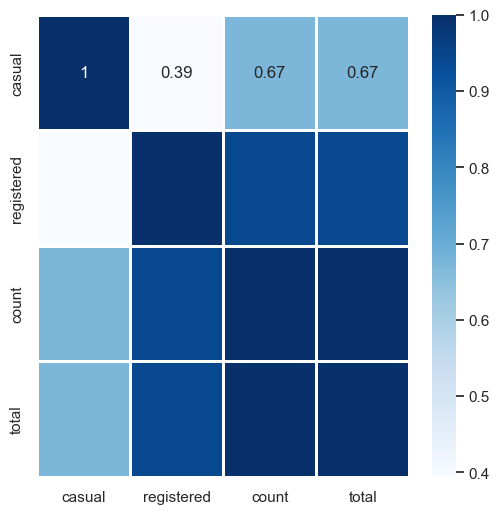

In [10]:
# Removing repeating columns
bike_cnt = bike[['casual', 'registered', 'count']]

bike_cnt['total'] = bike_cnt['casual'] + bike_cnt['registered']

plt.figure(figsize = (6,6))
ax = sns.heatmap(bike_cnt.corr(), annot = True, cmap='Blues', linewidth = 1)
plt.show()

In [11]:
## Dropping the redundant columns

bike.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
bike.shape

(730, 12)

Data Visualization
Converting into categorical columns


In [12]:
# Season
bike.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace = True)
#bike.season.value_counts(normalize = True)
bike.season.value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [13]:
# Months
bike.months.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike.months.value_counts()

months
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [14]:
# Weekday
bike.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike.weekday.value_counts()

weekday
Saturday     105
Sunday       105
Monday       105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: count, dtype: int64

In [15]:
# Weathersit
bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike.weathersit.value_counts()

weathersit
Clear             463
Misty             246
Light_rainsnow     21
Name: count, dtype: int64

Analyzing Categorical Variables


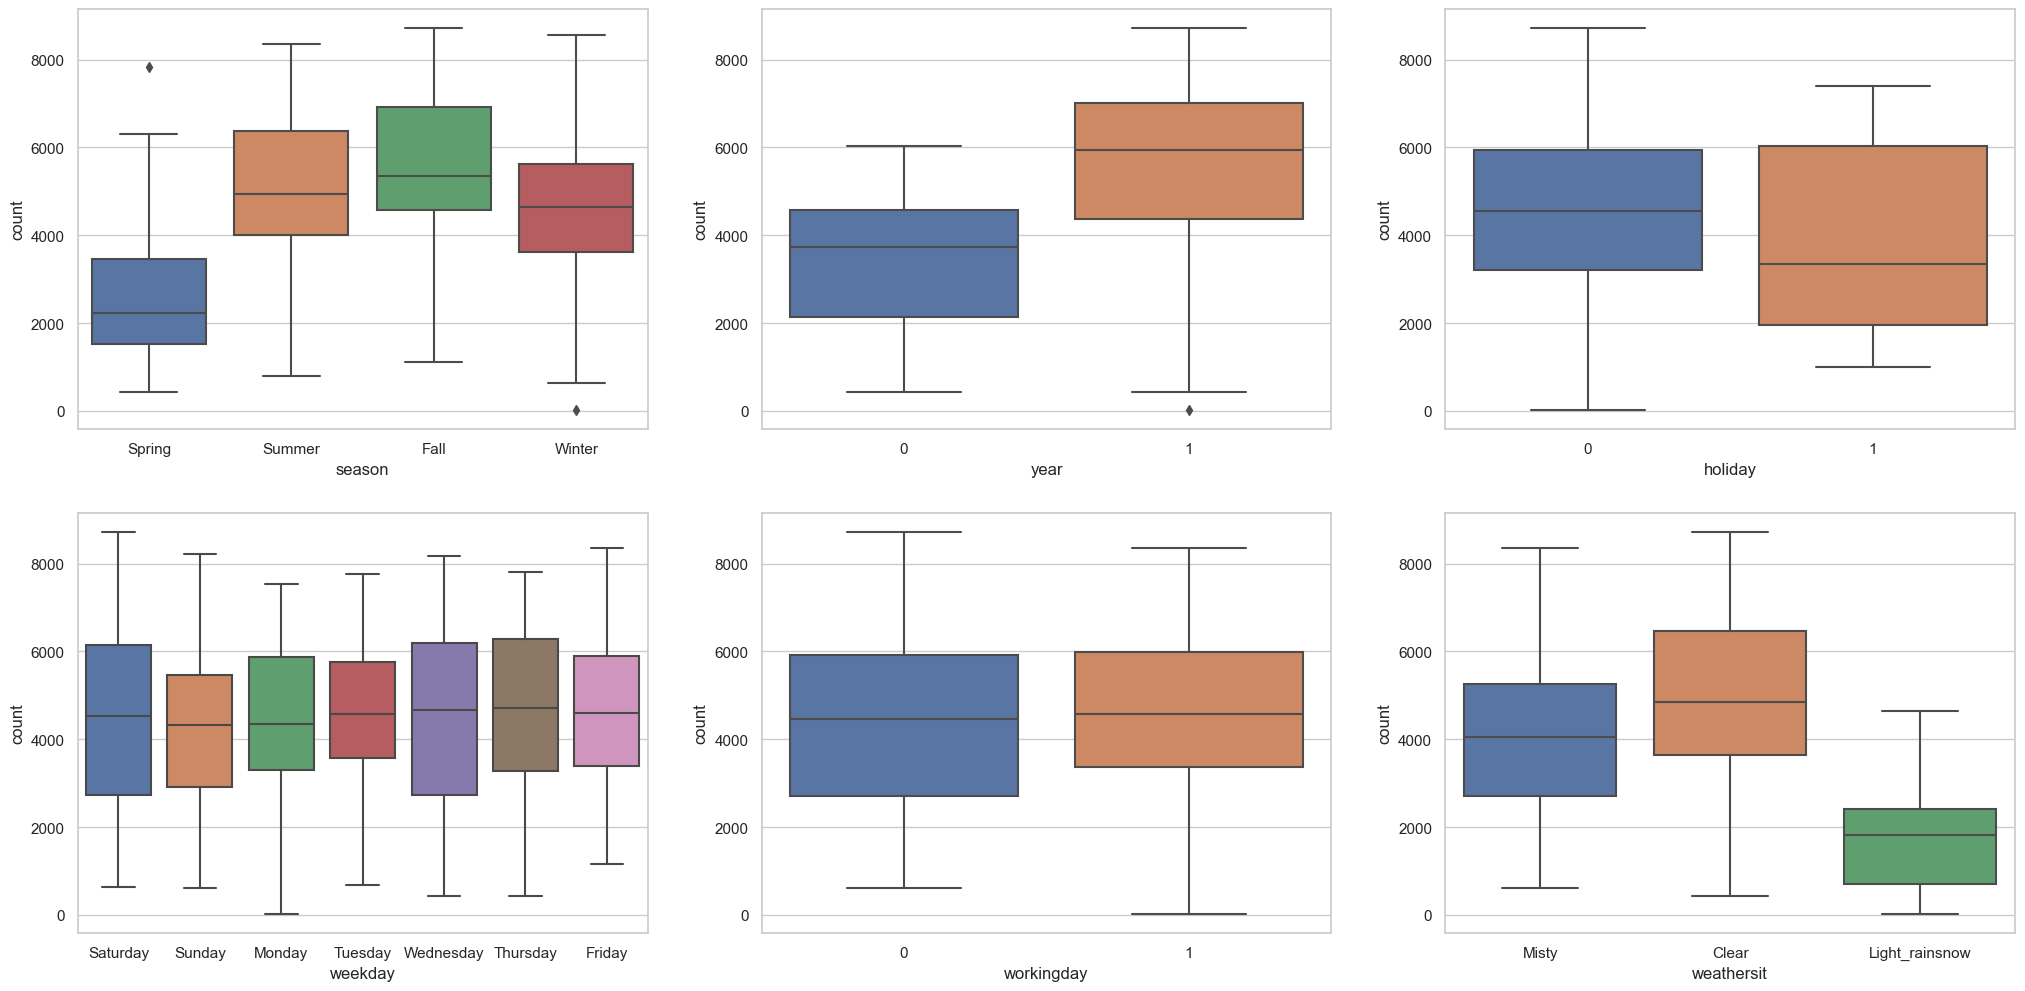

In [16]:
def boxplot_cat_var(cat_var,target):
    plt.figure(figsize=(25, 12))
    for i in range(0,len(cat_var)):
        plt.subplot(2,3,i+1)
        sns.boxplot(x = cat_var[i], y = target, data = bike)
    plt.show()

cat_var =['season','year','holiday','weekday','workingday','weathersit']
boxplot_cat_var(cat_var,'count')

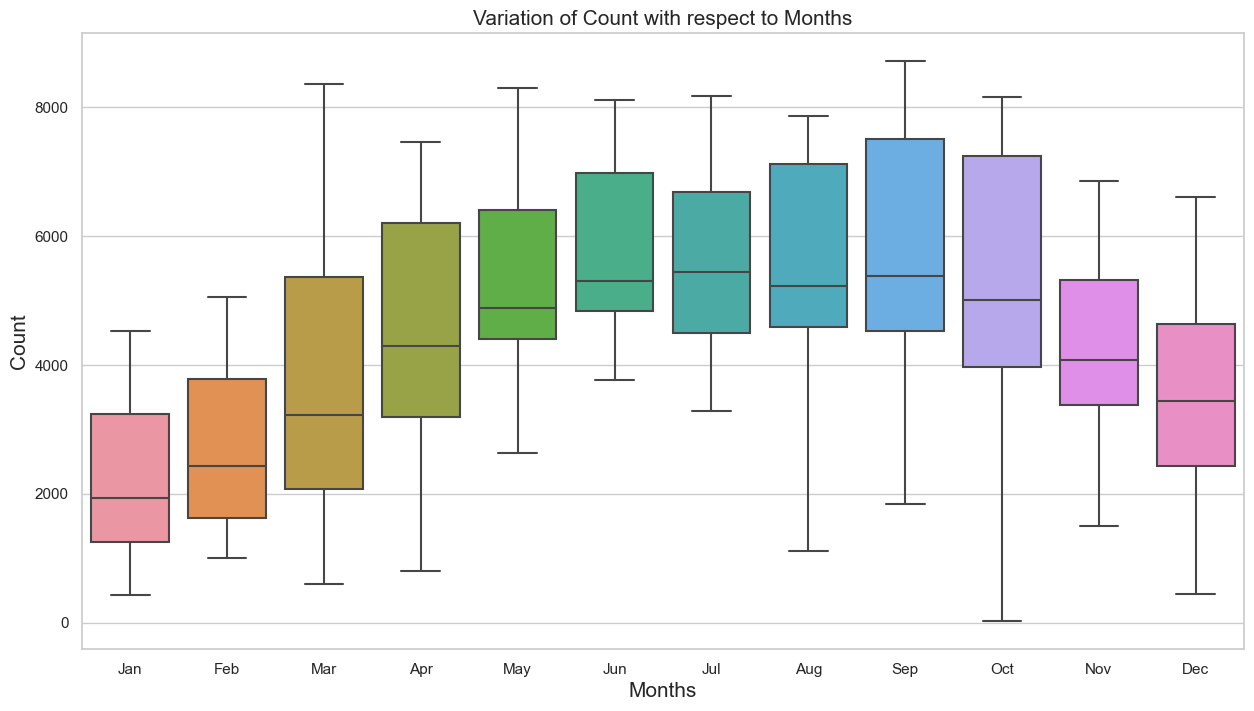

In [17]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'months', y = 'count', data = bike).set_title('Variation of Count with respect to Months', fontsize = 15)
plt.xlabel("Months", fontsize = 15) 
plt.ylabel("Count", fontsize = 15) 
plt.show()

In [18]:
# Function to generate statistics for categorical variables

def cat_stats(col):
    cat_df = bike.groupby(col)['count'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/bike['count'].sum()*100
    cat_df['count_perc']=cat_df['count']/bike['count'].count()*100
    return round(cat_df,2)

In [26]:
# Functions to generate plots for categorical variables

def cat_plots(col, x, y):
    plt.figure(figsize=(x, y))
    
    # First subplot
    plt.subplot(1, 2, 1)
    sns.barplot(x=col, y='count', data=bike)
    
    # Second subplot
    plt.subplot(1, 2, 2)
    sns.barplot(x=col, y='count', data=bike, hue='year', palette='Paired')
    
    plt.legend(labels=['2018', '2019'])
    plt.show()



In [19]:
cat_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
Fall,1061129,5644.30,188,32.24,25.75
Summer,918589,4992.33,184,27.91,25.21
Winter,841613,4728.16,178,25.57,24.38
Spring,469514,2608.41,180,14.27,24.66


AttributeError: 'numpy.int64' object has no attribute 'startswith'

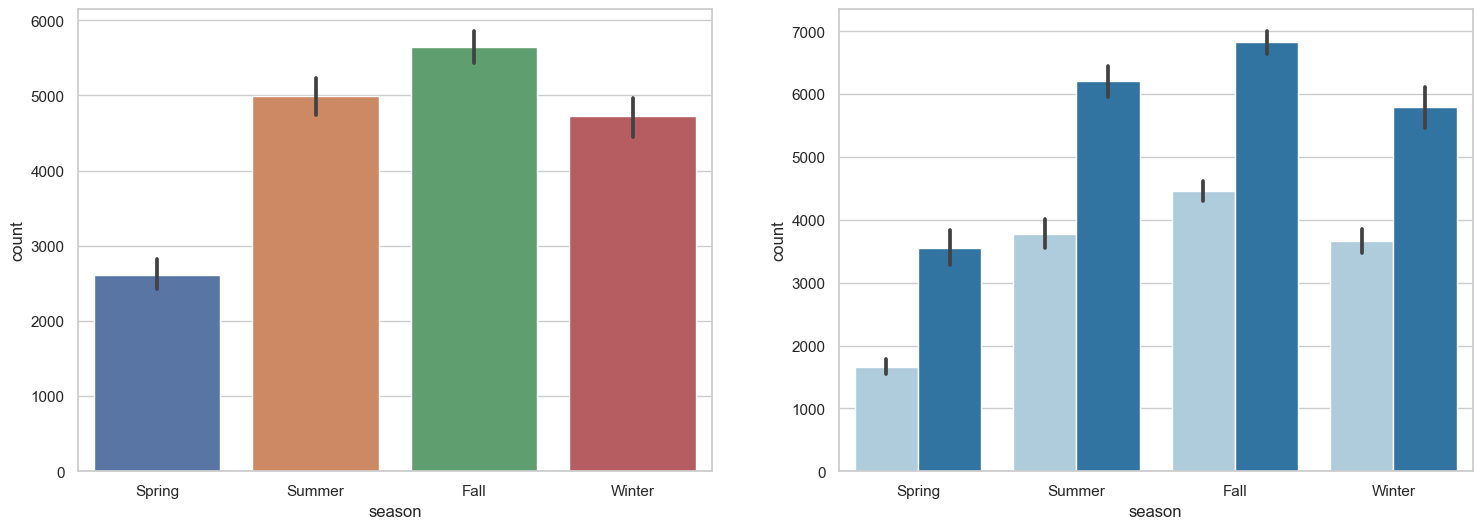

In [27]:
cat_plots('season', 18,6)

In [21]:
cat_stats('months')

,sum,mean,count,sum_perc,count_perc
months,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


AttributeError: 'numpy.int64' object has no attribute 'startswith'

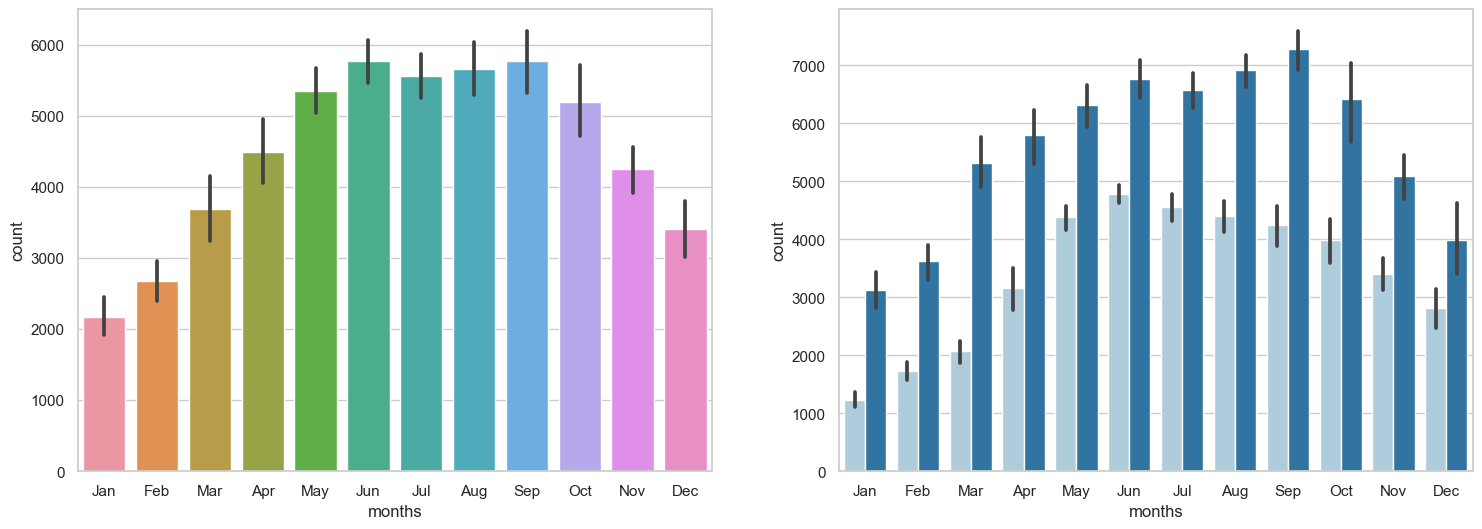

In [28]:
cat_plots('months', 18,6)

### Observation

* 32% of the bike booking happened in Fall, followed by Summer & Winter with 27% & 25% of total booking respectively


### Observation

* More than 10% perc of the bike booking happend in the months of May to Sep.

In [32]:
cat_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Misty,995024,4044.81,246,30.24,33.70
Light_rainsnow,37869,1803.29,21,1.15,2.88


In [33]:
cat_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Misty,995024,4044.81,246,30.24,33.70
Light_rainsnow,37869,1803.29,21,1.15,2.88


###  ANALYSING WEAKDAY

In [35]:
cat_stats('weekday')

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
Friday,487790,4690.29,104,14.82,14.25
Thursday,485395,4667.26,104,14.75,14.25
Saturday,477807,4550.54,105,14.52,14.38
Wednesday,471214,4574.89,103,14.32,14.11
Tuesday,469109,4510.66,104,14.25,14.25
Monday,455503,4338.12,105,13.84,14.38
Sunday,444027,4228.83,105,13.49,14.38


AttributeError: 'numpy.int64' object has no attribute 'startswith'

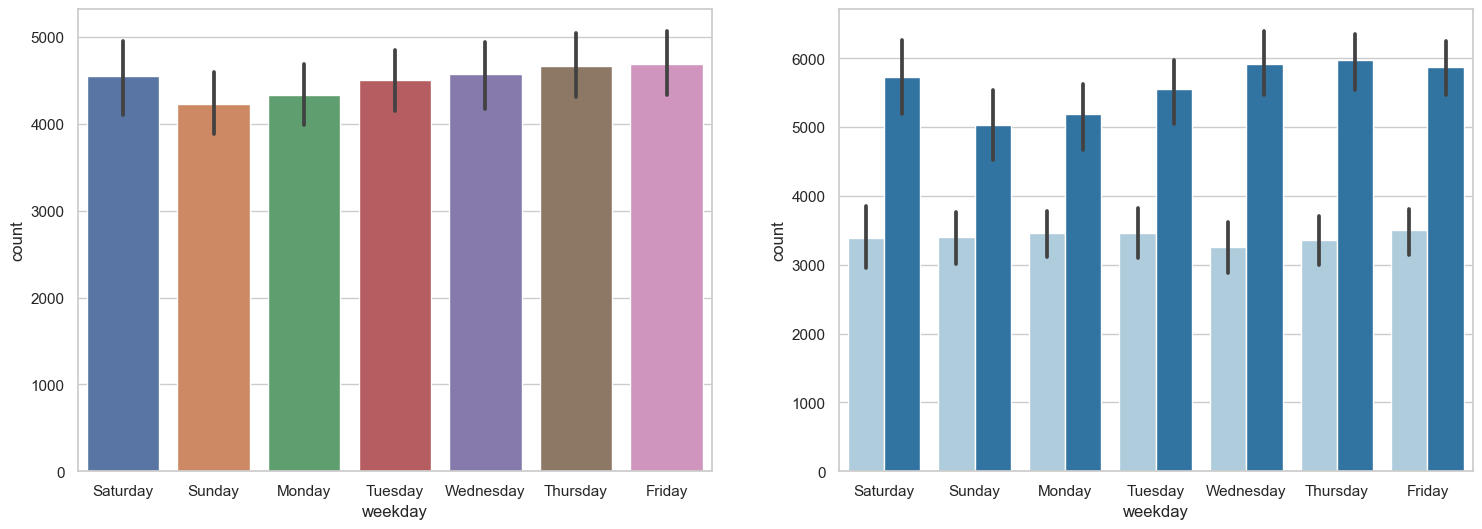

In [36]:
cat_plots('weekday',18,6)

### Observation 

* Bookings done on a weekday are almost evenly distributed i.e around 14%

### ANALYSING WORKINGDAY

In [37]:
cat_stats('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2290576,4590.33,499,69.6,68.36
0,1000269,4330.17,231,30.4,31.64


AttributeError: 'numpy.int64' object has no attribute 'startswith'

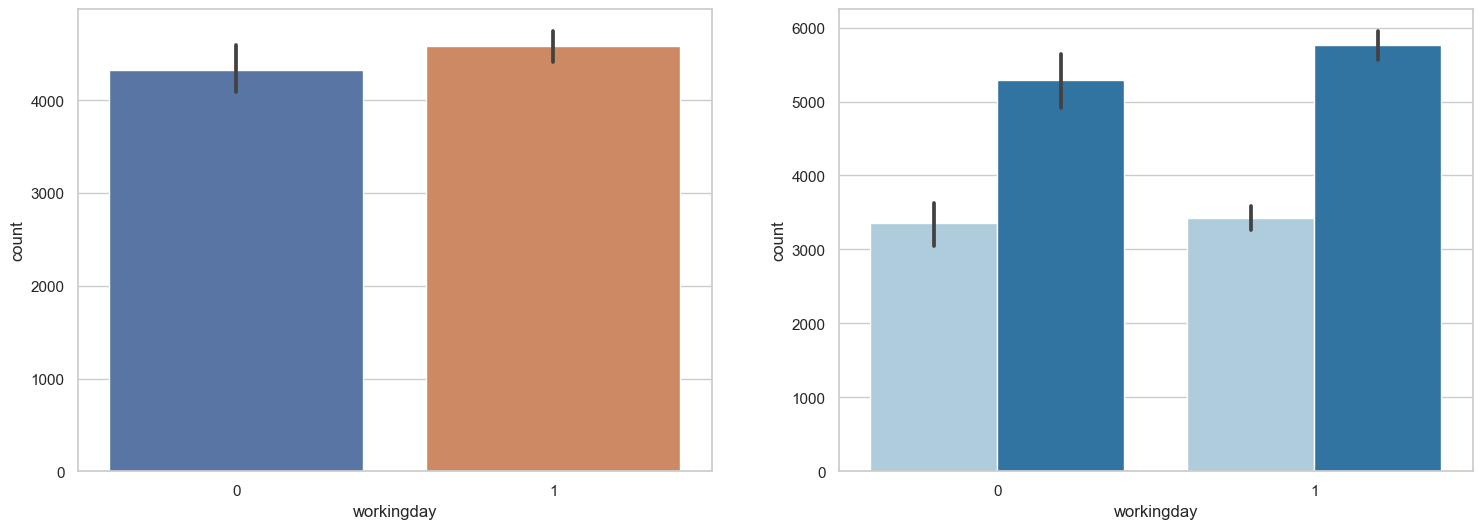

In [38]:
cat_plots('workingday', 18,6)

### Observation
        
* Almost 69% of the bike booking happened on a working day.

* ### Analyzing Holiday

In [39]:
cat_stats('holiday')

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


AttributeError: 'numpy.int64' object has no attribute 'startswith'

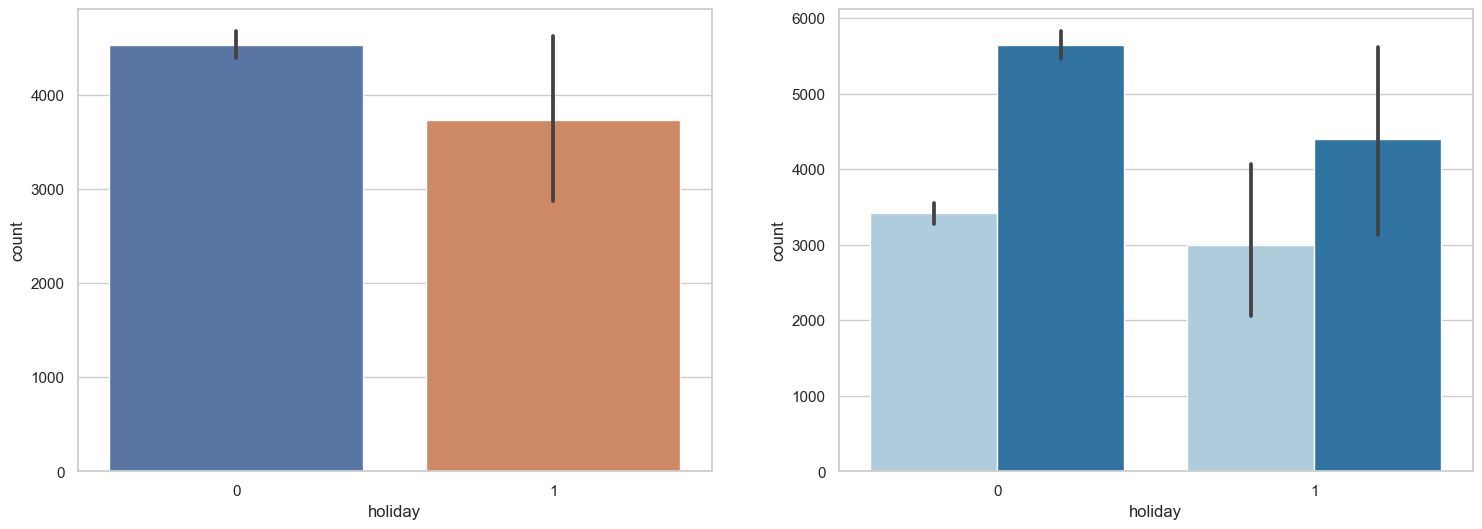

In [40]:
cat_plots('holiday', 18,6)

### Observation

* Around 97% of bike rentals took place during non-holiday time.

* ### Analyzing Year

In [41]:
cat_stats('year')

,sum,mean,count,sum_perc,count_perc
year,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


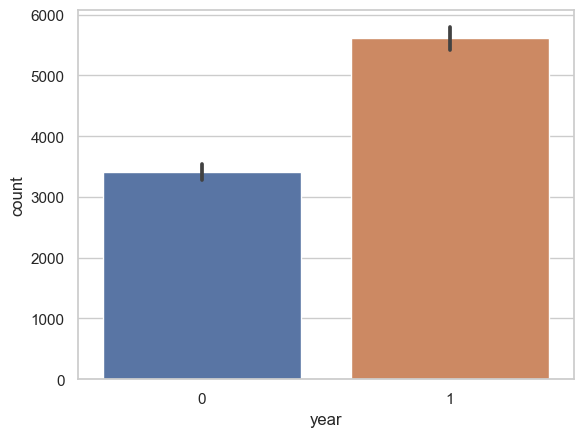

In [44]:
sns.barplot(x='year', y='count', data=bike)
plt.show()


 ### Observation
 
 * There has been a significant growth in demand during 2019 comapred to 2018

# Numerical Variable Analysis
 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

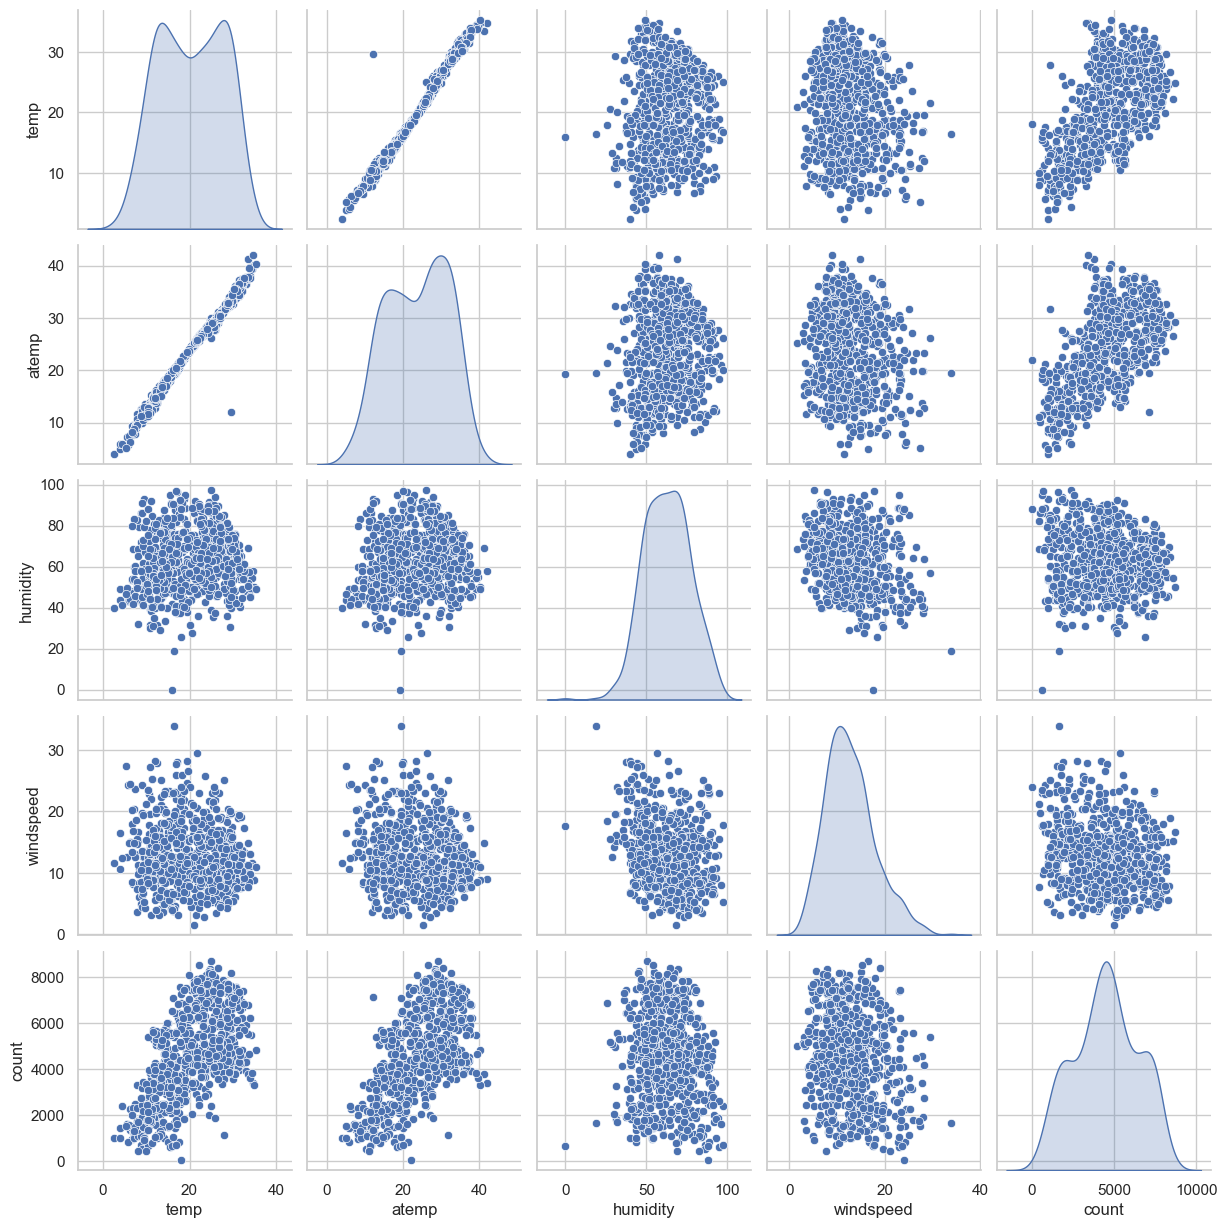

In [45]:
bike_num = bike[['temp','atemp','humidity','windspeed','count']]
sns.pairplot(bike_num,diag_kind='kde')
plt.show()

### Observation 

* It seems there is a Linear relation between 'temp','atemp' and 'cnt' , we can see both variables has close values

<Axes: >

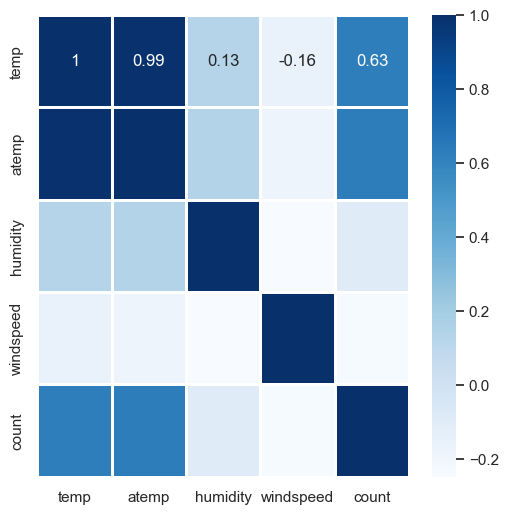

In [46]:
plt.figure(figsize = (6,6))
sns.heatmap(bike_num.corr(), cmap='Blues', annot=True, linewidth=1)

<Figure size 4000x600 with 0 Axes>

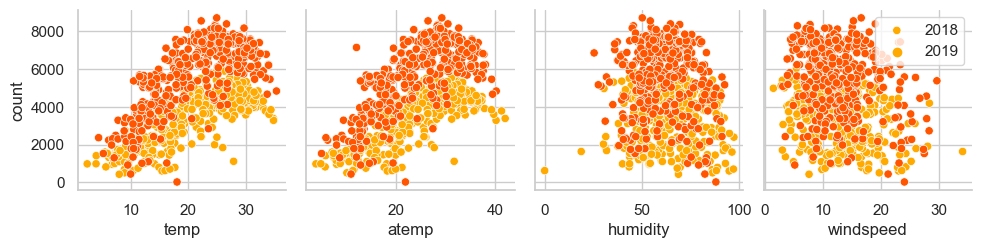

In [47]:
# Checking the impact of year against the numerical variable : 
plt.figure(figsize = (40,6))
ax = sns.pairplot(x_vars=['temp', 'atemp', 'humidity', 'windspeed'], y_vars=['count'] , data=bike, hue='year', palette='autumn_r')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

# Preparation of Data

In [49]:
# Dummy Variable
months=pd.get_dummies(bike.months,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)

In [50]:
### Merging the dataframe

bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,season,year,months,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,Spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,Spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [51]:
### Dropping the unwanted columns

bike.drop(['months', 'weekday', 'weathersit', 'season'], axis = 1, inplace = True)

In [52]:
bike.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [53]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Aug             730 non-null    bool   
 1   Dec             730 non-null    bool   
 2   Feb             730 non-null    bool   
 3   Jan             730 non-null    bool   
 4   Jul             730 non-null    bool   
 5   Jun             730 non-null    bool   
 6   Mar             730 non-null    bool   
 7   May             730 non-null    bool   
 8   Nov             730 non-null    bool   
 9   Oct             730 non-null    bool   
 10  Sep             730 non-null    bool   
 11  Monday          730 non-null    bool   
 12  Saturday        730 non-null    bool   
 13  Sunday          730 non-null    bool   
 14  Thursday        730 non-null    bool   
 15  Tuesday         730 non-null    bool   
 16  Wednesday       730 non-null    bool   
 17  Light_rainsnow  730 non-null    boo

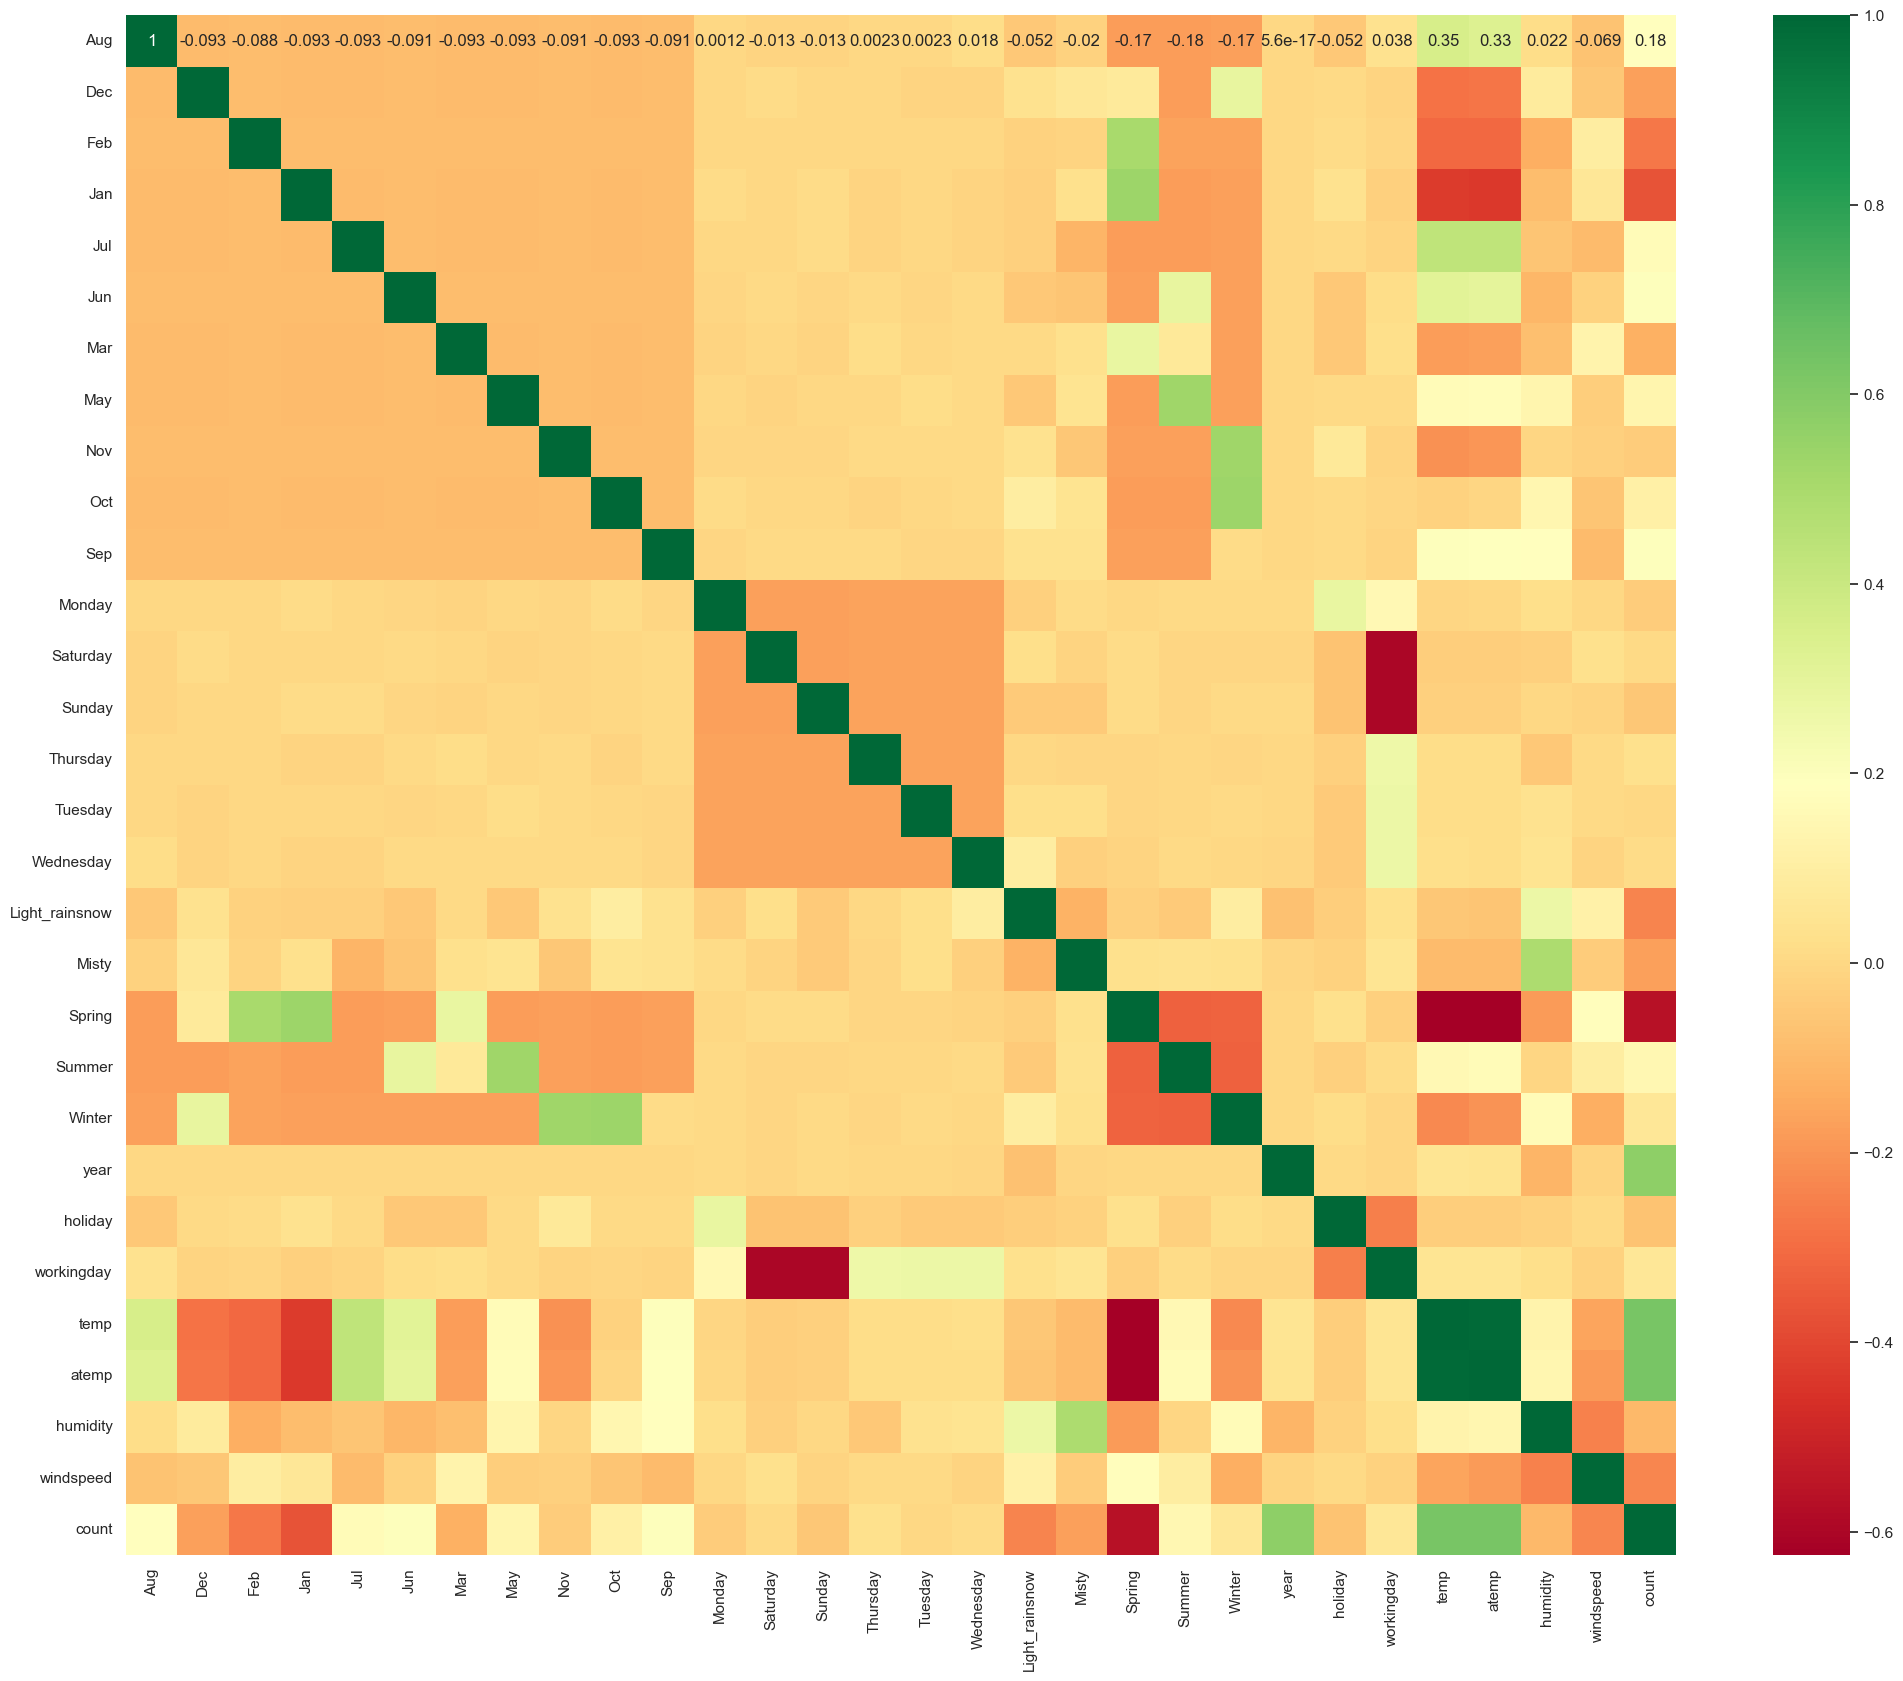

In [54]:
plt.figure(figsize=(25, 20))
sns.heatmap(bike.corr(), cmap='RdYlGn', annot = True)
plt.show()

### Observations

<ul>
    <li> We can observe multi-colinearity between the variables. </li>
    <li> We will use either temp or atemp as there is high multicolinearity amongst the two.</li>
    <li> temp, atemp and year has a strong correlation with count. </li>
    <li> Spring is negatively correlated with count. </li>
    <li> Misty weather and humidity are correlated.</li>
    <li> Months and corresponding weathers are co-related as expecetd</li>            
</ul>    

# Splitting the data into Train and Test Data set

In [55]:
from sklearn.model_selection import train_test_split
bike_train, bike_test = train_test_split(bike,train_size = 0.7, random_state=100)

In [58]:
bike_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.108257,23.500287,63.123710,12.834912,4485.337255
std,0.500429,0.157763,0.468282,7.431626,8.090963,14.153170,5.292031,1950.666077
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000
50%,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000


In [57]:
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


## Rescaling the bike_train dataframe

* We will be using MinMaxScaler for scaling the dataframe

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [60]:
bike_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
576,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,1,0,0,10.489153,11.5850,48.3333,23.500518,1796
482,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,1,0,0,15.443347,18.8752,48.9583,8.708325,4220
111,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,0,0,1,13.803347,16.0977,72.9583,14.707907,1683


In [61]:
# Appliyng scaler on numerical vars
num_vars = ['temp','humidity','windspeed','count']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [62]:
bike_train[num_vars].head()

,temp,humidity,windspeed,count
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973
111,0.345824,0.751824,0.380981,0.191095


In [63]:
bike_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
576,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,1,0,1,0.815169,33.1448,0.725633,0.264686,0.827658
426,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,1,0,0,0.442393,20.6746,0.640189,0.255342,0.465255
728,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,1,0,0,0.245101,11.5850,0.498067,0.663106,0.204096
482,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,1,0,0,0.395666,18.8752,0.504508,0.188475,0.482973
111,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,0,0,1,0.345824,16.0977,0.751824,0.380981,0.191095


# Linear Model Building

In [64]:
# Building the model

y_train = bike_train.pop('count')
X_train = bike_train

In [65]:
X_train

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed
576,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,1,0,1,0.815169,33.14480,0.725633,0.264686
426,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,1,0,0,0.442393,20.67460,0.640189,0.255342
728,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,1,0,0,0.245101,11.58500,0.498067,0.663106
482,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,1,0,0,0.395666,18.87520,0.504508,0.188475
111,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,0,0,1,0.345824,16.09770,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,1,0,1,0.863973,35.35440,0.679690,0.187140
53,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,0,0,1,0.202618,12.28585,0.435939,0.111379
350,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,0,0,0,0.248216,12.46855,0.577930,0.431816
79,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,0,0,1,0.462664,20.48675,0.759870,0.529881


## Recursive Feature Elimination: 

***We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE***

In [66]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [69]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=20)  # Corrected usage
rfe = rfe.fit(X_train, y_train)


In [70]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 9),
 ('Mar', False, 8),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 6),
 ('Sep', True, 1),
 ('Monday', False, 3),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 5),
 ('Tuesday', False, 4),
 ('Wednesday', False, 7),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [71]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Feb', 'Jan', 'Jul', 'May', 'Nov', 'Sep', 'Saturday', 'Sunday',
       'Light_rainsnow', 'Misty', 'Spring', 'Summer', 'Winter', 'year',
       'holiday', 'workingday', 'temp', 'humidity', 'windspeed'],
      dtype='object')

In [72]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Jun', 'Mar', 'Oct', 'Monday', 'Thursday', 'Tuesday',
       'Wednesday', 'atemp'],
      dtype='object')

In [73]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Manual Model Development using statsmodel

In [83]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_rfe = sm.add_constant(X_train_rfe)

In [84]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 




In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calculateVIF(X_train_rfe)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## MODEL1

In [87]:
print(X_train_rfe.dtypes)
print(y_train.dtypes)


const             float64
Dec                  bool
Feb                  bool
Jan                  bool
Jul                  bool
May                  bool
Nov                  bool
Sep                  bool
Saturday             bool
Sunday               bool
Light_rainsnow       bool
Misty                bool
Spring               bool
Summer               bool
Winter               bool
year                int64
holiday             int64
workingday          int64
temp              float64
humidity          float64
windspeed         float64
dtype: object
float64


In [88]:
X_train_rfe = pd.get_dummies(X_train_rfe, drop_first=True)

In [89]:
X_train_rfe.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN
X_train_rfe.dropna(inplace=True)  # Drop rows with NaN values


In [90]:
X_train_lm1 = sm.add_constant(X_train_rfe.values)  # Convert DataFrame to numpy array
y_train_np = y_train.values 

In [ ]:
X_train_rfe.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf values with NaN


In [93]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [94]:
print(X_train_rfe.dtypes)  # Check the types of each column
print(y_train.dtypes)

const             float64
Dec                  bool
Feb                  bool
Jan                  bool
Jul                  bool
May                  bool
Nov                  bool
Sep                  bool
Saturday             bool
Sunday               bool
Light_rainsnow       bool
Misty                bool
Spring               bool
Summer               bool
Winter               bool
year                int64
holiday             int64
workingday          int64
temp              float64
humidity          float64
windspeed         float64
dtype: object
float64


In [95]:
# Convert all boolean columns to integers (1 for True, 0 for False)
X_train_rfe = X_train_rfe.astype({'Dec': 'int', 'Feb': 'int', 'Jan': 'int', 'Jul': 'int',
                                  'May': 'int', 'Nov': 'int', 'Sep': 'int', 'Saturday': 'int',
                                  'Sunday': 'int', 'Light_rainsnow': 'int', 'Misty': 'int',
                                  'Spring': 'int', 'Summer': 'int', 'Winter': 'int'})


In [96]:
X_train_rfe.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train_rfe.dropna(inplace=True)

In [97]:
# Add a constant term for the intercept
X_train_lm1 = sm.add_constant(X_train_rfe)

# Fit the OLS model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print the summary of the linear regression model
print(lr1.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          5.20e-189
Time:                        17:44:57   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2475      0.030      8.

## MODEL 2


In [98]:
# M2
X_train_new = X_train_rfe.drop(['Sunday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,97.18
11,Spring,5.79
17,temp,4.88
13,Winter,3.88
12,Summer,3.49
3,Jan,2.38
18,humidity,1.97
16,workingday,1.88
2,Feb,1.87
6,Nov,1.82


In [99]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          5.20e-189
Time:                        17:45:38   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2970      0.038      7.

## MODEL 3

In [100]:
# M3
X_train_new = X_train_lm1.drop(['Saturday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,92.13
10,Spring,5.79
16,temp,4.88
12,Winter,3.88
11,Summer,3.49
3,Jan,2.38
17,humidity,1.96
2,Feb,1.87
6,Nov,1.82
1,Dec,1.66


In [101]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.3
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          4.46e-187
Time:                        17:46:22   Log-Likelihood:                 518.09
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     491   BIC:                            -917.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3301      0.038      8.

## MODEL 4

In [102]:
# M4
X_train_new = X_train_lm1.drop(['workingday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,89.64
10,Spring,5.79
15,temp,4.88
12,Winter,3.87
11,Summer,3.49
3,Jan,2.38
16,humidity,1.96
2,Feb,1.87
6,Nov,1.82
1,Dec,1.66


In [103]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.3
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          1.73e-187
Time:                        17:47:02   Log-Likelihood:                 516.41
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     492   BIC:                            -920.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3413      0.038      9.

## MODEL 5

In [104]:
# M5
X_train_new = X_train_lm1.drop(['Feb'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,86.09
9,Spring,5.39
14,temp,4.55
11,Winter,3.86
10,Summer,3.42
15,humidity,1.95
5,Nov,1.78
2,Jan,1.68
8,Misty,1.57
4,May,1.51


In [105]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.5
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          5.48e-188
Time:                        18:21:35   Log-Likelihood:                 514.92
No. Observations:                 510   AIC:                            -995.8
Df Residuals:                     493   BIC:                            -923.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3286      0.037      8.

##  MODEL 6

In [106]:
# M6
X_train_new = X_train_lm1.drop(['Nov'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,81.78
8,Spring,5.20
13,temp,4.25
10,Winter,3.63
9,Summer,3.31
14,humidity,1.95
2,Jan,1.65
7,Misty,1.56
4,May,1.50
3,Jul,1.49


In [107]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.1
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          3.78e-188
Time:                        18:22:04   Log-Likelihood:                 512.59
No. Observations:                 510   AIC:                            -993.2
Df Residuals:                     494   BIC:                            -925.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3111      0.036      8.

## MODEL 7

In [109]:
# M7
X_train_new = X_train_lm1.drop(['Dec'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,79.78
7,Spring,5.18
12,temp,3.99
9,Winter,3.63
8,Summer,3.26
13,humidity,1.93
1,Jan,1.57
6,Misty,1.56
3,May,1.50
2,Jul,1.49


In [110]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.4
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          6.51e-189
Time:                        18:22:41   Log-Likelihood:                 511.68
No. Observations:                 510   AIC:                            -993.4
Df Residuals:                     495   BIC:                            -929.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3036      0.036      8.

## MODEL 8

In [111]:
# M8
X_train_new = X_train_lm1.drop(['Jan'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,77.25
6,Spring,5.12
11,temp,3.71
8,Winter,3.52
7,Summer,3.23
12,humidity,1.93
5,Misty,1.56
2,May,1.50
1,Jul,1.48
3,Sep,1.30


In [112]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.7
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          2.78e-189
Time:                        18:31:32   Log-Likelihood:                 509.79
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     496   BIC:                            -932.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2914      0.035      8.

## MODEL 9

In [113]:
# M9
X_train_new = X_train_lm1.drop(['Spring'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,45.78
11,humidity,1.91
6,Summer,1.70
10,temp,1.61
5,Misty,1.55
2,May,1.47
1,Jul,1.43
7,Winter,1.29
4,Light_rainsnow,1.24
3,Sep,1.19


In [114]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          9.19e-189
Time:                        18:32:06   Log-Likelihood:                 505.75
No. Observations:                 510   AIC:                            -985.5
Df Residuals:                     497   BIC:                            -930.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2283      0.027      8.

## MODEL 9

In [117]:
print(X_train_lm1.columns)


Index(['const', 'Jul', 'May', 'Sep', 'Light_rainsnow', 'Misty', 'Summer',
       'Winter', 'year', 'holiday', 'temp', 'humidity', 'windspeed'],
      dtype='object')


In [118]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Tue, 24 Sep 2024   Prob (F-statistic):          9.19e-189
Time:                        18:35:05   Log-Likelihood:                 505.75
No. Observations:                 510   AIC:                            -985.5
Df Residuals:                     497   BIC:                            -930.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2283      0.027      8.

## Observations 
* There seems to be very low Multicollinearity between the predictors and the p-values for all the predictors seems to be significant.The model looks good to me,hence considering this is as the final model (unless the test data metrics are not significantly close to this number).

In [119]:
# Checking the parameters obtained
lr1.params

const             0.228319
Jul              -0.047343
May               0.010151
Sep               0.096712
Light_rainsnow   -0.230714
Misty            -0.050009
Summer            0.078256
Winter            0.134849
year              0.228146
holiday          -0.098759
temp              0.596742
humidity         -0.187383
windspeed        -0.188866
dtype: float64

# Final Model Interpretation

<h2> 
    <font color = black>
        <span style='font-family:Candra'>
    Hypothesis Testing 
                 </font>
</h2>



<p> Hypothesis Testing States that<br>
    <blockquote>
        H0:B1=B2=...=Bn=0 <br>
        H1: at least one  Bi!=0
    </blockquote><br>


<h2> 
    <span style='font-family:Candra'>
    <font color = black>
    F-Staitsics
        </font>
        </span>
    
</h2>
    <p> F-Statistics is used for testing the overall significance of the Model. The higher the F-Statistics, the more significant the Model is.</p>
    <blockquote>
        F-Statistics :       237.0 <br>
        Prob (F-statistic):  6.89e-190
    </blockquote>   
    


<span>
    <b>Observation:</b> The F-Statistics value of 237 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant
</span>    
</div>


<h1>
    <span>
        <font color = black>
    Best fitted model equation
        </font>
            </span> 
        </h1>




<p style="font-size:20px">
    <span style='font-family:Candra'>
count=0.226223 - (0.047814 x Jul) + (0.096174 x Sep) - (0.231830 x Light_rainsnow) − (0.050192 x Misty) + (0.081529 x Summer) + (0.134695 x Winter) + (0.227954 x year) - (0.098909 x holiday) + (0.597749 x temp) − (0.184135 x humidity) - (0.189481 x windspeed)

</span>
    </p>
</div>


### Interpretation of the co-efficients

<p>  </p>
    
<ul>
<li><b>const</b> : The Constant value of ‘0.226223’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.226223 units </li><hr>

 <li><b>Jul</b> : A coefficient value of ‘-0.047814’ indicated that a unit increase in Jul variable, decrease the bike hire numbers by 0.047814 units </li><hr> 

 <li><b>Sep</b> : A coefficient value of ‘0.096174’ indicated that, a unit increase in Sep variable increases the bike hire numbers by 0.096174 units </li><hr> 

 <li><b>Light_rainsnow</b> : A coefficient value of ‘-0.231830’ indicated that a unit increase in Light_rainsnow variable, decreases the bike hire numbers by 0.231830 units </li><hr> 

 <li><b>Misty</b> : A coefficient value of ‘-0.050192’ indicated that, a unit increase in Misty variable decreases the bike hire numbers by 0.050192 units </li><hr> 

 <li><b>Summer</b> : A coefficient value of ‘0.081529’ indicated that a unit increase in Summer variable increase the bike hire numbers by 0.081529 units </li><hr> 

 <li><b>Winter</b> : A coefficient value of ‘0.134695’ indicated that a unit increase in Winter variable increases the bike hire numbers by 0.134695 units</li><hr> 

 <li><b>year</b> : A coefficient value of ‘0.227954’ indicated that a unit increase in year variable increases the bike hire numbers by 0.227954 units </li><hr> 

 <li><b>holiday</b> : A coefficient value of ‘-0.098909’ indicated that, a unit increase in holiday variable, decreases the bike hire numbers by 0.098909 units </li><hr> 

 <li><b>temp</b> : A coefficient value of ‘0.597749’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.597749 units </li><hr> 

 <li><b>humidity</b> : A coefficient value of ‘-0.184135’ indicated that a unit increase in humidity variable decreases the bike hire numbers by 0.184135 units </li><hr> 

<li><b>windspeed</b> : A coefficient value of ‘-0.189481’ indicated that a unit increase in windspeed variable decreases the bike hire numbers by 0.189481 units </li><hr>
</ul>
</span>

# Model Validation


<span>
     Validating the assumption of Linear Regression Model : 
        <ul>
            <li> Linear Relationship </li>
            <li> Homoscedasticity </li>
            <li> Absence of Multicollinearity </li>
            <li> Independence of residuals </li>
            <li> Normality of Errors</li>
        </ul>
    
</span>

# Analyzing Linear relationship

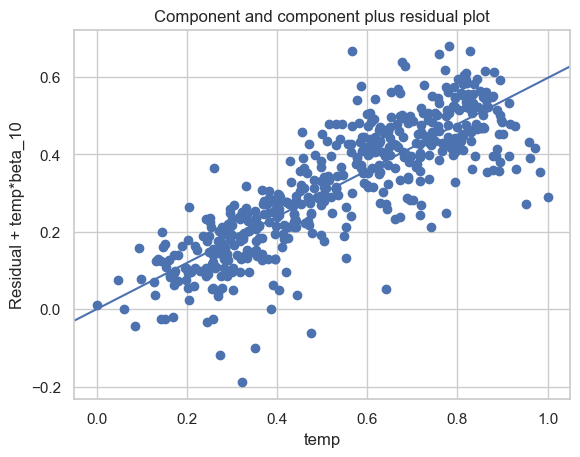

In [120]:
sm.graphics.plot_ccpr(lr1, 'temp')
plt.show()

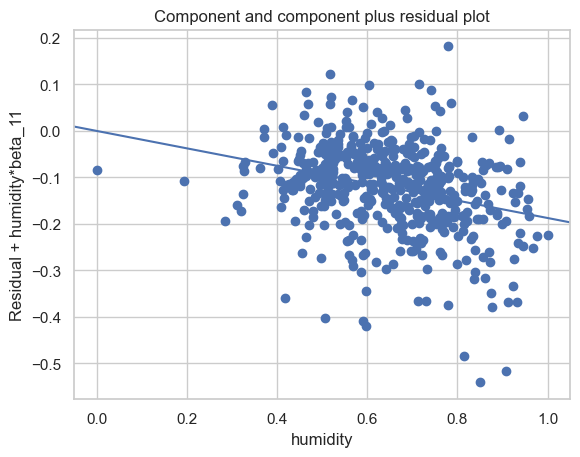

In [121]:
sm.graphics.plot_ccpr(lr1, 'humidity')
plt.show()

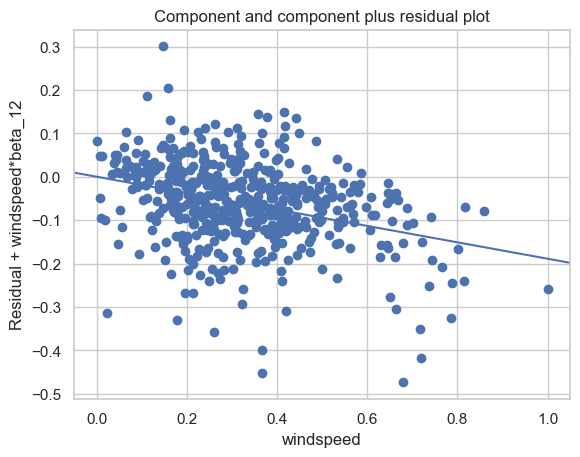

In [122]:
sm.graphics.plot_ccpr(lr1, 'windspeed')
plt.show()

## Observations

* The above plots depict the relationship between the model and the different predictor variables. We can clearly see that the  linearity is well preserved

# Homoscedasticity

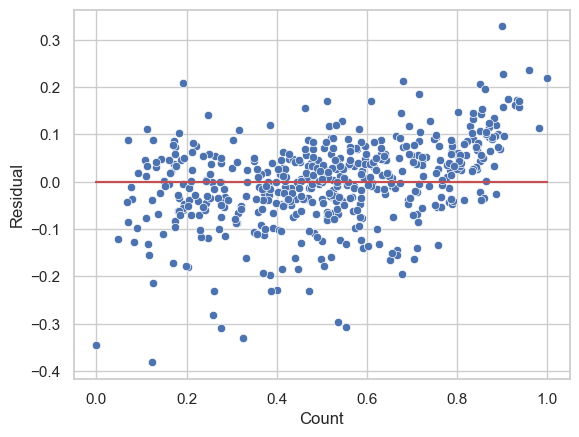

In [124]:
# Predicted values and residuals
y_train_pred = lr1.predict(X_train_lm1)
residual = y_train - y_train_pred

# Scatter plot of actual values vs residuals
sns.scatterplot(x=y_train, y=residual)  # Use keyword arguments x and y

# Plot the reference line at y=0 (no residuals)
plt.plot(y_train, (y_train - y_train), '-r')

# Label the axes
plt.xlabel('Count')
plt.ylabel('Residual')

# Show the plot
plt.show()

### Observation

* No such visible pattern observed in residual values, thus we can conclude homoscedacity is well preserved

# Multicolinearity

In [125]:
X_train_new.columns

Index(['const', 'Jul', 'May', 'Sep', 'Light_rainsnow', 'Misty', 'Summer',
       'Winter', 'year', 'holiday', 'temp', 'humidity', 'windspeed'],
      dtype='object')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


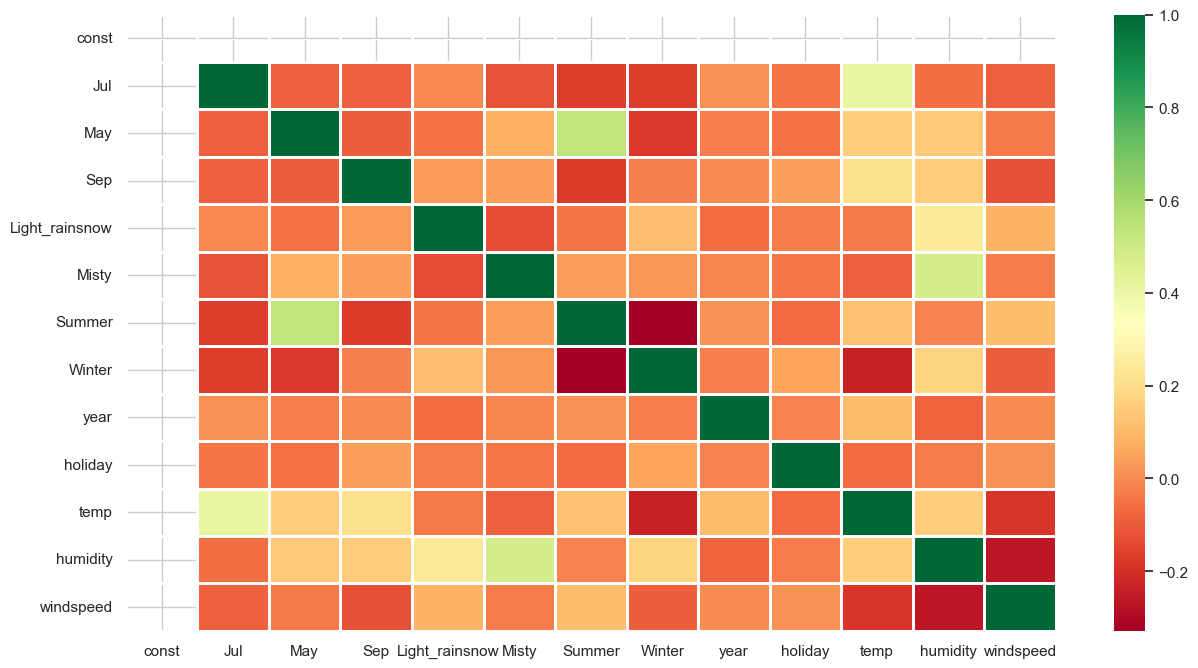

In [126]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [127]:
# Run the function to calculate VIF for the final model
calculateVIF(X_train_new)

,Features,VIF
0,const,45.78
11,humidity,1.91
6,Summer,1.70
10,temp,1.61
5,Misty,1.55
2,May,1.47
1,Jul,1.43
7,Winter,1.29
4,Light_rainsnow,1.24
3,Sep,1.19



## Observation

* Since the VIF value is less than 5 for all the predictor varibales we can conclude that the multicolinearity is quite insignificant.

#  Normality of Error


/var/folders/m6/pfbwq6sn3hq_367yhv23xx080000gn/T/ipykernel_76080/3305655234.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((res), bins = 10)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


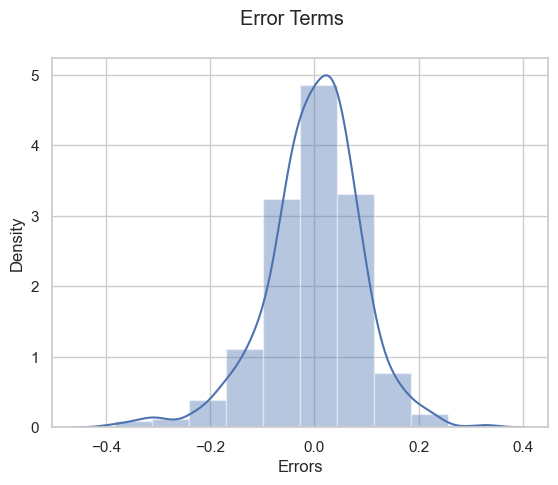

In [128]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 10)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

## Observation

* Based on the above plot we can conclude that the error is normally distributed

<h1>
    <font color = Black>
        <span>
        Predictions based on final model
        </span>    
    </font>
</h1>

<h2>   
      <font color = black >
          <span>
            Scaling the bike_test dataframe 
              </span> 
        </font>    
</h2>
<p>Applying scaler.transform() to all numeric variables in test dataset.
</p>
 

In [129]:
num_vars = ['temp', 'humidity', 'windspeed','count']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test[num_vars].head()

,temp,humidity,windspeed,count
184,0.831783,0.657364,0.084219,0.692706
535,0.901354,0.610133,0.153728,0.712034
299,0.511964,0.837699,0.334206,0.303382
221,0.881625,0.437098,0.339570,0.547400
152,0.817246,0.314298,0.537414,0.569029


In [130]:
bike_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,24.250312,0.638221,0.313293,0.522154
std,0.500809,0.187620,0.459303,0.233187,8.281075,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.046591,4.941955,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.355429,17.090025,0.529197,0.198843,0.378595
50%,0.000000,0.000000,1.000000,0.558172,24.700000,0.625590,0.300126,0.524678
75%,1.000000,0.000000,1.000000,0.755981,31.124313,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,0.984424,41.318550,1.002146,0.807474,0.963300


# Dividing X_test and y_test

In [131]:
y_test = bike_test.pop('count')
X_test = bike_test

In [132]:
X_train_lm1 = X_train_lm1.drop(['const'], axis = 1)

In [135]:
col1=X_train_lm1.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm1 = sm.add_constant(X_test)

X_test_lm1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   Jul             220 non-null    bool   
 2   May             220 non-null    bool   
 3   Sep             220 non-null    bool   
 4   Light_rainsnow  220 non-null    bool   
 5   Misty           220 non-null    bool   
 6   Summer          220 non-null    bool   
 7   Winter          220 non-null    bool   
 8   year            220 non-null    int64  
 9   holiday         220 non-null    int64  
 10  temp            220 non-null    float64
 11  humidity        220 non-null    float64
 12  windspeed       220 non-null    float64
dtypes: bool(7), float64(4), int64(2)
memory usage: 13.5 KB


In [134]:
y_pred = lr1.predict(X_test_lm1)

# Model Evaluation

Text(0, 0.5, 'y_pred')

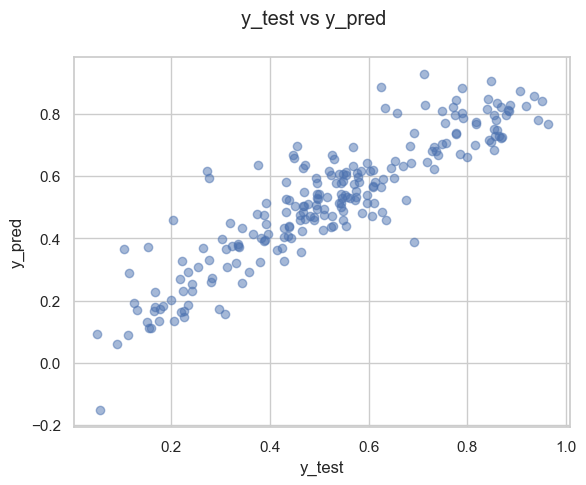

In [136]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')


<h2>   
      <font color = black >
          <span style='font-family:Candra'>
          R<sup>2</sup> Value Calculation for bike_test dataframe           
        </font>    
</h2>
</span>

In [137]:
from sklearn.metrics import r2_score
r2 = round(r2_score(y_test, y_pred),4)
r2

0.8053


<h2>   
<span>
    <font color = Black >
          Adjusted R<sup>2</sup> Value Calculation for bike_test dataframe           
        </font>    
</h2>
<br>

</span>
<span style="font-size:18" >
    <span style>
        <font color = black > 
      <math> R<sup>2</sup><sub>adj</sub>=1−</math>
        <span style="display: inline-block;vertical-align: middle;">
    <div style="text-align: center;border-bottom: 1px solid black;">(1-R<sup>2</sup>) x (n-1)</div>
     <div style="text-align: center;">(n-p-1)</div> 
        </span>
        </font>
</span>
</span>

In [138]:

# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.794

<span style='font-family:Candra'>
<h3>  <span style='font-family:Candra'> 
      <font color = black >
            Model Train & Test R2 Statsitics Comparison           
        </font>    
</h3>
<table>
    <thead>
    <tr><th>Measurement</th><th>Train Dataset</th><th>Test Dataset</th></tr>
    </thead>
    <tbody>
        <tr><td>R2 Value</td><td>84.0%</td><td>83.6%</td></tr>
        <tr><td>Adjusted R2 Value</td><td>80.5%</td><td>79.4%</td></tr>
    </tbody>
</table>
    <p> The model seems to be good enough for generalized datasets </p>
</span>

# Calculating RMSE for the selected Model 

In [139]:
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0965

# The Final Analysis


<span>
<p><b>Based on the model, the variables which are influencing the bike bookings are: </b></p>
        <br>
<li><b>Temperature (Temp)</b><br> It is evident from the model that customers prefer warm and pleasant temperature for bike booking </li>
<br>
<li><b>Year</b><br> There was significant rise in bike booking in 2019 compared to 2018. It is expected that during post-Covid people will avail this service rather travelling in crowded buses and trains </li>
<br>
<li><b> Season </b><br>It seems that customers prefered Summer and Fall season, hence, a good number of bikes should be available during this time.</li>
<br>
<li><b> Weather </b><br>It seems that customers avoided renting bikes during light snow and rain and preferred clear and cloudy weather</li>

        

    

# Recommendations to increase sales
    
    
    

<br>


<li><b>Frequent Sanitisation of Bikes</b>
    <br>
    Frequent Sanitisation of the Bikes and indicating the same in the booking app will help in building the trust between the customer and company
    </li>
    <br>

<li><b>Providing discounts and better deals</b><br>During rainy seasons, BoomBike should offer deals and discounts to attaract more customers.</li>
<br>

<li><b> Rain Covers or Umbrellas </b><br>Attached umbrellas or rain protective gears with bikes may attract more customers during rainy season</li><br>



